### Interactions involving polar molecules

[File as PDF](https://github.com/fcichos/SoftMatterPhysics/blob/fa7aaefef50c09b1bbb457c4ecf3a56fd2dd891f/source/notebooks/L8/1_Forces%20and%20Interactions.pdf)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
from scipy.constants import c,epsilon_0,e,physical_constants

%config InlineBackend.figure_format = 'retina' 
# the lines below set a number of parameters for plotting, such as label font size, 
# title font size, which you may find useful
plt.rcParams.update({'font.size': 14,
                     'font.family':'sans-serif',
                     'axes.titlesize': 16,
                     'axes.labelsize': 18,
                     'axes.labelpad': 14,
                     'lines.linewidth': 1,
                     'lines.markersize': 10,
                     'xtick.labelsize' : 18,
                     'ytick.labelsize' : 18,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',}) 


Many molecules exhibit a dipole or even higher moments due to the fact that the charges are not evenly distributed over the molecular structure. Some of the atoms exhibit a stronger tendency to accept charges than others. This is typically measured by electronegativity and provides an idea of whether atoms rather donate or accept a charge when binding to other atoms. While homo-atomic bonds therefore do not have dipole moments, hetero-atomic bonds do (see table).


| Bond    | Dipole moment [D]    
| :------ | :----------: |
| C-C     | 0     |
| C-N     | 0.22  |
| O-H     | 1.51  |
| F-H     | 1.94  |
| N=O     | 2.0  |



| Molecule    | Dipole moment [D]    
| :------ | :----------: |
| hexane    | 0     |
| water     | 1.85  |
| ethanol     | 1.7  |
| acetone     | 2.9  |



The dipole moment of a molecule is measured by the displacement of two charges $±q$ from each other:

\begin{equation}
\vec{u}=q\vec{l}.
\end{equation}

Its direction is from the negative to the positive side. It creates an electric field that is given by

\begin{equation}
\vec{E}=\frac{3(\vec{u}\cdot \hat{r})\hat{r}-\vec{u}}{4\pi \epsilon_{0}\epsilon r^{3}},
\end{equation}

where $\hat{r}=\vec{r}/|r|$. The dipole self-energy, i.e., the energy to create the dipole in a solvent is given by

\begin{equation}
\mu^{0}=\frac{1}{4\pi \epsilon_{0}\epsilon}\left [ \frac{q^2}{2a}+\frac{q^2}{2a}-\frac{q^2}{l}\right ].
\end{equation}

For $l=2a$ this results in $\mu^0=q^2/(8\pi\epsilon_0 \epsilon a)=u^2/(4\pi\epsilon_0 \epsilon l^3 )$ and thus yields a similar dependence of the chemical potential on the dielectric function $\epsilon$ as in the case of a single charge. The result is a similar dependence of the solubility on the dielectric function.

The plot below shows the electric field of a dipole:

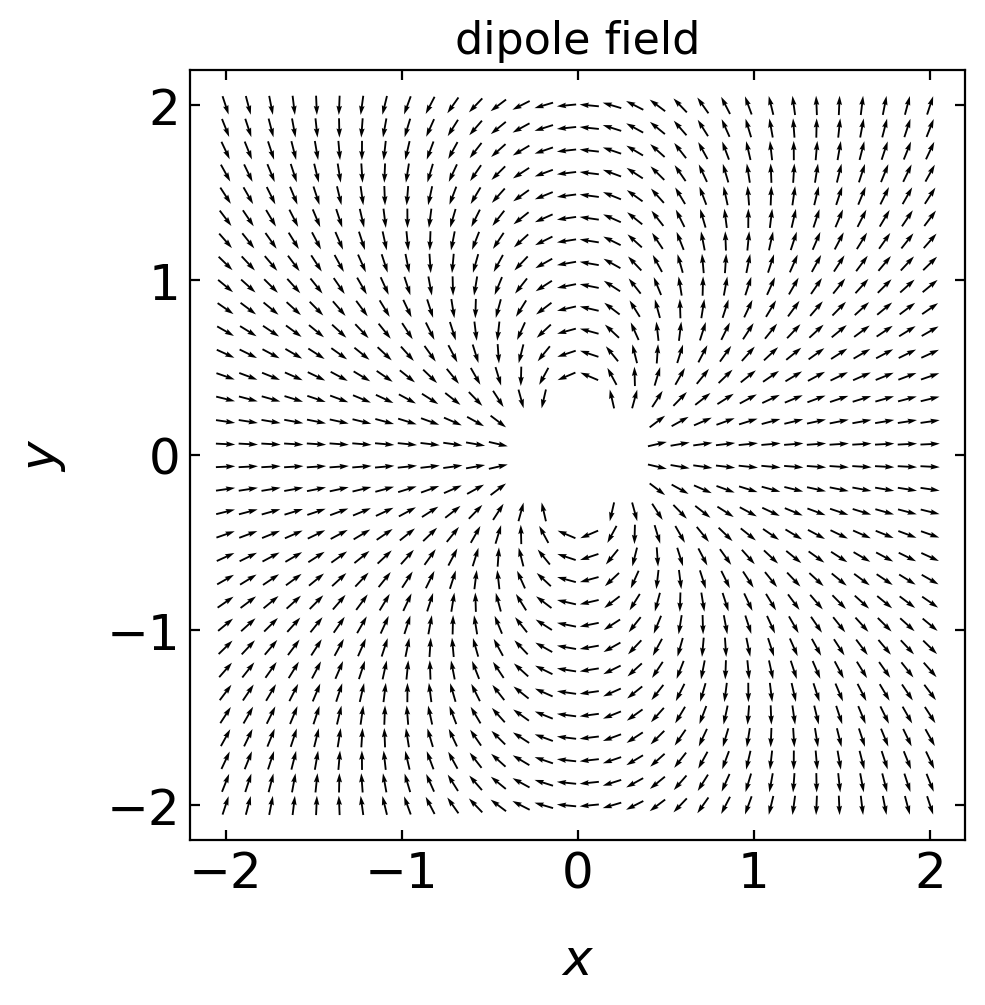

In [3]:
plt.figure(figsize=(5, 5))
 
# generate grid
x=np.linspace(-2, 2, 32)
y=np.linspace(-2, 2, 32)
x, y=np.meshgrid(x, y)
 
def E(q, a, x, y):
    return q*(x-a[0])/((x-a[0])**2+(y-a[1])**2)**(1.5), \
        q*(y-a[1])/((x-a[0])**2+(y-a[1])**2)**(1.5)
 
# calculate vector field
Ex1, Ey1=E(-1, [-0.1, 0], x, y)
Ex2, Ey2=E(1, [0.1, 0], x, y)
Ex=Ex1+Ex2
Ey=Ey1+Ey2

E_max=5
E=np.sqrt(Ex**2+Ey**2)

Ex.flat[E.flat[:]>E_max]=np.nan
Ey.flat[E.flat[:]>E_max]=np.nan
# plot vecor field
plt.quiver(x, y, Ex/E, Ey/E, pivot='middle', headwidth=3, headlength=5,scale=40)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('dipole field')
plt.show()


#### Ion–dipole interaction


![Charge Dipole](img/dipole_q.png)

The interaction energy of a dipole with a charge can be calculated by

\begin{equation}
w(r)=-\frac{qQ}{4\pi\epsilon_{0}\epsilon}\left [ \frac{1}{r-\frac{1}{2}l \cos(\theta)}-\frac{1}{r+\frac{1}{2}l \cos(\theta)}\right ]=-\frac{qQ}{4\pi\epsilon_{0}\epsilon r^2}\cos(\theta)=-uE\cos(\theta)
\end{equation}

where the last two equations are assuming that the distance between both objects $r$ is much larger than the extent of the dipole $l$ itself. From the last equation, we see that the interaction can be either attractive or repulsive. An angle $θ=0^°$ results in an attractive interaction, while $θ=180^°$ yields repulsive interaction. Using a single charge (e.g., an $\mathrm{Na^+}$ ion) and a dipole of $u=1.85\, {\rm D}$ (water molecule) results in an interaction energy of about $39\, k_{\rm B}T$. Ions align and bind polar molecules like water, for example. The alignment is caused by the torque $\tau=\vec{u}\times \vec{E}$. For arbitrary polar molecules this is called **solvation**, while for water the term **hydration** is used. The strength of the hydration can effect the mobility of ions in solution as it makes them effective charges and is of interest, for example, in the study of ion transport through ion channels, as this requires the stripping of the hydration shell.



<div class="alert alert-info">
    
**Example: Sodium Ion Hydration**

    
</div>

![](img/NA_hydration.png)

The plot below shows the ion dipole interaction for a sodium ion and a water molecule as a function of distance.


In [4]:
def ion_dipole(u,r,l,theta,epsilon):    
    q=u/l
    f=e*q/(4*np.pi*epsilon*epsilon_0)
    return(-f*(1/(r-0.5*l*np.cos(theta))-1/(r+0.5*l*np.cos(theta))))

In [5]:
D=physical_constants["atomic unit of electric dipole mom."][0]
J2eV=physical_constants["electron volt-joule relationship"][0]

In [6]:
r=np.linspace(0.1e-9,0.5e-9,200)
l=0.02e-9

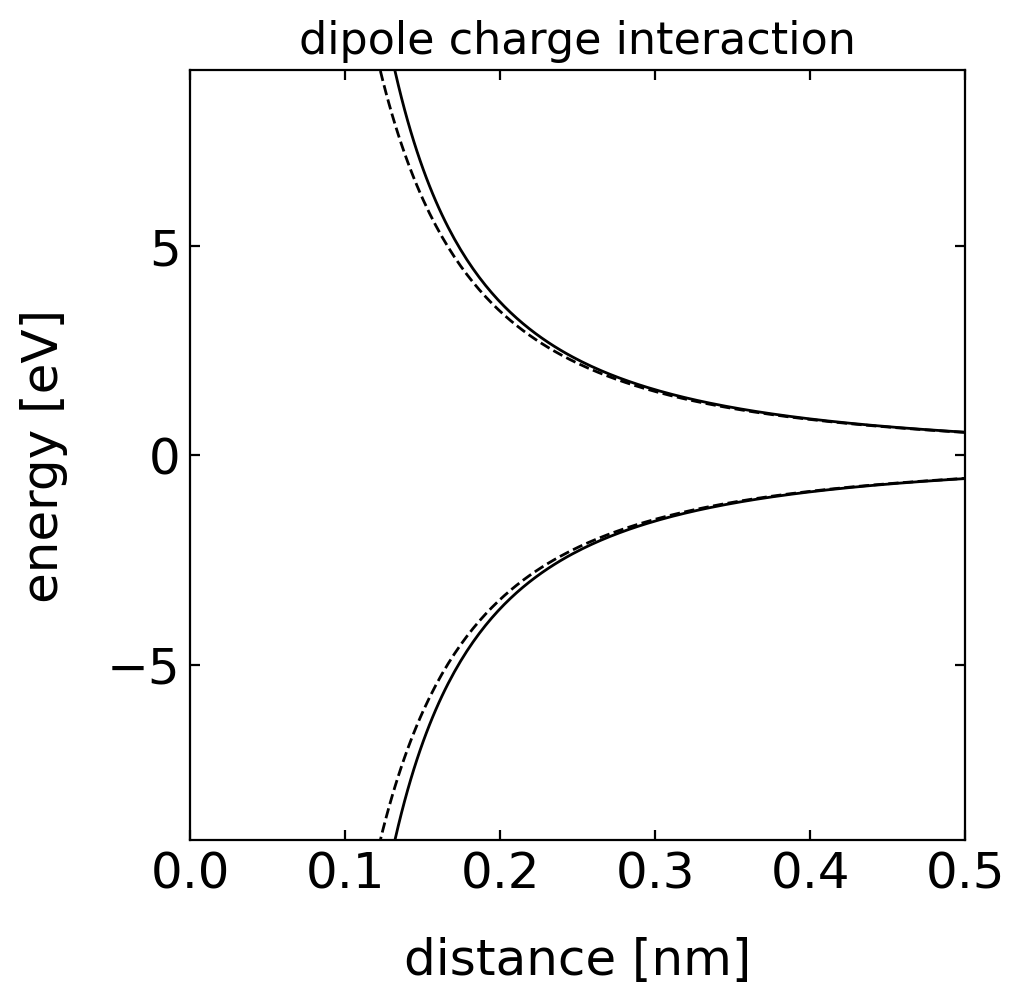

In [8]:
plt.figure(figsize=(5,5))
plt.plot(r*1e9,ion_dipole(1.8*D,r,l,0,1)/J2eV,'k--')
plt.plot(r*1e9,ion_dipole(1.8*D,r,l,np.pi,1)/J2eV,'k--')
plt.plot(r*1e9,ion_dipole(1.8*D,r,l*5,0,1)/J2eV,'k')
plt.plot(r*1e9,ion_dipole(1.8*D,r,l*5,np.pi,1)/J2eV,'k')
plt.ylim(-9.2,9.2)
plt.xlim(0,0.5)
plt.xlabel("distance [nm]")
plt.ylabel("energy [eV]")
plt.title("dipole charge interaction")
plt.show()

The table below shows some selected hydration properties of ions. The hydrated radius determines the diffusion of the ion in water. The hydration number is the number of orientationally bound water molecules. Typically, smaller ions have a larger hydration number. 


| Ion    | Bare Ion radius (nm) | Hydrated radius (nm) | Hydration number |
| :------ | :----------: | :----------: | :----------: |
| Na+ | 0.095 | 0.36 | 4 |
| Mg2+ | 0.065 | 0.43 | 6 |
| Cl-| 0.181| 0.33 | 1 |
|OH-|0.176 | 0.3 | 3 |

### Dipole-Dipole Interactions

The interaction of two dipole will depend on three angles, the two angles of the dipoles with the connecting axis $\theta_1, \theta_2$ and the angle $\phi$ between the two planes which contain the individual dipoles and the axis. The figure below shows the corresponding geometry. 

![Dipole](img/dipole_dipole.png)

The energy of the two dipoles at a distance $r$ follows then wihtout a detailed calculation with

\begin{equation}
w(r,\theta_2,\theta_2,\phi)=-\frac{u_1 u_2}{4\pi \epsilon_0 \epsilon r^3}\left [ 2\cos(\theta_1) \cos(\theta_2)-\sin(\theta_1)\sin(\theta_2)\cos(\phi)\right ]
\end{equation}

The image below  (taken from the book by Israelachvili) shows the dipole dipole interaction energy for the **parallel** and the **in-line** configuration as indicated. As shown, the in-line configutation with facing opposite charges is more favorable.

![Dipole Energy](img/dipole_energy.png)

The energies that are typically found are also larger than the thermal energy at room temperature and thefore lead to ordering effects. 

### Rotating Dipoles, angle averaged Potential


The equations we derived so far deliver the energy for a specific fixed orientation of dipoles for example. However, molecules with dipoles may rotate and undergo rotational Brownian motion driven by thermal energy. This rotational diffusion can be very fast and the rotational sampling creates an average interaction that may scale differently with the distance. To get an effective distance dependence in the interaction, we have to integrate the Boltzmann factor over the orientational degrees of freedoms, i.e.

\begin{equation}
\exp\left ( -\frac{w(r)}{k_B T} \right)=\frac{\int \exp\left (-\frac{w(r,\Omega)}{k_B T} d\Omega\right )}{\int d\Omega}=\left \langle  \exp\left (-\frac{w(r,\Omega)}{k_B T}\right ) \right \rangle_{\Omega}
\end{equation}

with 

$$d\Omega =\sin(\theta)d\theta d\phi$$

and

$$\int d\Omega=4\pi$$

\begin{equation}
\exp\left ( -\frac{w(r)}{k_B T} \right) =\frac{1}{4\pi}\int_0^{2\pi}d\phi\int_0^{\pi}\exp\left ( -\frac{w(r,\phi\theta)}{k_B T} \right)\sin(\theta)d\theta
\end{equation}

When $w(r,\theta)<< k_B T$ then we can expand the Boltzmann factor


\begin{equation}
\exp\left ( -\frac{w(r)}{k_B T} \right) \approx 1-\frac{w(r)}{k_B T}+\frac{1}{2}\left (\frac{w(r)}{k_B T} \right )^{2}+\ldots
\end{equation}

and therefore obtain

\begin{equation}
w(r)=\langle w(r,\Omega)- \frac{w(r,\Omega)^2}{2k_B T}+\ldots \rangle _{\Omega}
\end{equation}

which we can readily use to calculate the interaction energy of a charge and a dipole

\begin{align}
w(r)=&\langle -\frac{Q u \cos(\theta)}{4\pi\epsilon_0\epsilon r^2} - \left ( \frac{Q u }{4\pi\epsilon_0\epsilon r^2}\right) ^2 \frac{\cos(\theta)^2}{2k_B T}+\ldots )\rangle\\
=&  \frac{Q^2 u^2}{6(4\pi\epsilon_0\epsilon)^2k_B T r^4}
\end{align}

when $k_B T>\frac{Q u }{4\pi\epsilon_0\epsilon r^2}$.
Interestingly, this interaction energy for the freely rotating dipole in the electric field of an ion decays as $r^{-4}$, while the static interation decayed as $r^{-2}$. Also, the interaction of the freely rotating dipole is always attrative as compared to the static dipole charge interaction.

The previous result can also be obtained when using $G=-k_B T \ln(Z)$, where 

\begin{equation}
Z=\int \exp(-\frac{w(r,\Omega)}{k_B T}) d\Omega
\end{equation}

is the partition function. 

### Dipole Dipole interactionn with rotating dipoles

We can extend the above calculation now also to two dipoles interacting when freely rotating. The interaction energy was given by

\begin{equation}
w(r,\theta_2,\theta_2,\phi)=-\frac{u_1 u_2}{4\pi \epsilon_0 \epsilon r^3}\left [ 2\cos(\theta_1) \cos(\theta_2)-\sin(\theta_1)\sin(\theta_2)\cos(\phi)\right ]
\end{equation}

and therefore the partition function can be calculated as 

\begin{equation}
Z=\int_0^{\pi}\int_{0}^{\pi}\int_{0}^{2\pi}e\exp(-\beta e(r,\theta_1,\theta_2,\phi))\sin(\theta_1)\sin(\theta_2)d\phi d\theta_1 d\theta_2
\end{equation}

The result of this calculation is the **Keesom interaction energy**

\begin{equation}
w(r)=-\frac{u_1^{2}u_{2}^2}{3(4\pi\epsilon\epsilon_0)^2 k_B T r^6}
\end{equation}

when 

\begin{equation}
k_BT >\frac{u_1 u_2}{4\pi\epsilon_0 \epsilon r^3}
\end{equation}

The Keesom interaction tells on one side that permanent dipoles align themselves to be alway attractive. It further belongs to a set of 3 different electrostatic interactions, which scale as $r^{-6}$ and which are termed **van der Waals** interactions. 

## Interactions involving polarizability

All atomic and molecular systems carry the potential to get polarized in an external electric field. This polarization gives rise to a dipole moment $u_{ind}$, that is in linear response proportional to the external electric field. The dipole itself also creates an electric field. There are different types of polarizability. We will address two of them, i) the electronic polarizability, i.e. shifting the center of mass of positive and negative charges of a molecule or atom, ii) the reorientation of a permanent electric dipole in and external electric field which is an orientational polarization. 

![](img/polarizability.png)

We consider a very simple classical model for the electronic polarizability. An electron is orbiting a positive nucleus and is subjected to en electric field according to the above image. In the stationary state, the forces on the charges exerted by the external electric field and the internal forces balance and give rise to the polarized state with a dipole moment.

The external force on each charge is given by

$$
F_{ext}=-eE
$$

while the internal force between teh two charges is

$$
F_{int}=-\frac{e^{2}}{4\pi \epsilon_0 R^{2}}\sin(\theta)\approx \frac{e^{2}l}{4\pi \epsilon_0 R^{3}}=-\frac{e u_{ind}}{4\pi \epsilon_0 R^3}=F_{ext}
$$

We can transform the latter equation to yield the induced dipole moment

$$
u_{ind}=4\pi\epsilon_0 R^3 E=\alpha_0 E
$$

Accordingly, the electronic polarizability of the atom is 

$$
\alpha_0=4\pi\epsilon_0 R^3
$$

which just says that the polarizability scales with the volume of the object, which is found in many occations, including the scattering and absorption cross sections of nanoparticles. 


### Ion induced dipole interaction



### Polarizability of polar molecules